# Change Point Analysis and Statistical Modeling for Assessing Event-Driven Impacts on Brent Oil Prices

# Overview
This study investigates how significant political, economic, and environmental events affect Brent oil prices. Using change point analysis and Bayesian statistical modeling, we aim to pinpoint key moments of change in historical price data and associate these changes with major events like policy shifts, geopolitical tensions, sanctions, and OPEC decisions. By understanding these links, stakeholders can gain insights into the dynamics driving oil market volatility.

# Business Need
The oil market's high volatility poses challenges for investors, policymakers, and energy companies. To effectively manage risk and strategize in response to rapid price shifts, these stakeholders require insights into the factors behind oil price changes. Birhan Energies, a consultancy specializing in energy market intelligence, aims to provide this actionable intelligence. Understanding how specific events impact Brent oil prices will help clients make informed investment decisions, develop resilient policies, and optimize operational strategies.

# Objective

1. Identify key events that have impacted Brent oil prices over the past decade.
2. Quantify the effect of each event on oil price changes.
3. Develop a comprehensive data-driven analysis framework for detecting change points in oil prices and linking them with causal events.
4. Generate insights to inform investment strategies, policy decisions, and operational planning for stakeholders in the energy sector.

# 1. Data Collection

### Import Necessary Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings("ignore")

In [2]:
# logging
import os
import sys
import logging
import csv
from datetime import datetime, timedelta
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.options import Options
from bs4 import BeautifulSoup
# Append the correct src path for custom module imports
sys.path.append(os.path.abspath('../src'))
from data_logger import info_logger, error_logger

# Start logging
info_logger.info("Starting the change point analysis notebook.")

2024-11-15 02:21:57,710 - INFO - Starting the change point analysis notebook.


### Load Data set

In [3]:
# Oil dataset

df = pd. read_csv('../data/BrentOilPrices.csv')
info_logger.info("Dataset loaded successfully.")
df

2024-11-15 02:21:57,738 - INFO - Dataset loaded successfully.


,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
9006,"Nov 08, 2022",96.85
9007,"Nov 09, 2022",93.05
9008,"Nov 10, 2022",94.25
9009,"Nov 11, 2022",96.37


In [4]:
import pandas as pd 
import requests 
import json 
import plotly.graph_objects as go

## World GDP rate  

In [5]:
import wbdata
import pandas as pd
import datetime
# Define the indicator for GDP growth (annual %)
indicators = {'NY.GDP.MKTP.KD.ZG': 'GDP growth (annual %)'}
# Set the date range
start_date = datetime.datetime(1987, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
# Retrieve GDP growth data for the world
gdp_growth_data = wbdata.get_dataframe(indicators, country='WLD', date=(start_date, end_date), freq='Y')
info_logger.info("GDP macroeconomic indicater successfully downloaded")
# Display the GDP growth data
print(gdp_growth_data.head())
# Save to CSV
gdp_growth_data.to_csv('../data/world_gdp_growth_data.csv')
info_logger.info("GDP macroeconomic indicater successfully saved")

2024-11-15 02:21:58,629 - INFO - GDP macroeconomic indicater successfully downloaded
INFO:info_logger:GDP macroeconomic indicater successfully downloaded
2024-11-15 02:21:58,641 - INFO - GDP macroeconomic indicater successfully saved
INFO:info_logger:GDP macroeconomic indicater successfully saved


      GDP growth (annual %)
date                       
2022               3.089607
2021               6.259851
2020              -2.932043
2019               2.642216
2018               3.286613


### Inflation and Unemployment

In [6]:
import wbdata

# Define indicators for inflation and unemployment
indicators = {
    'FP.CPI.TOTL.ZG': 'Inflation (annual %)',
    'SL.UEM.TOTL.NE.ZS': 'Unemployment rate (%)'
}

# Retrieve data for the world from 1987 to 2022
inflation_unemployment_data = wbdata.get_dataframe(indicators, country='WLD', date=(start_date, end_date), freq='Y')
info_logger.info("inflation and unemployment macroeconomic indicater successfully downloaded")
print(inflation_unemployment_data)
inflation_unemployment_data.to_csv('../data/inflation_unemployment_data.csv')
info_logger.info("inflation and unemployment macroeconomic indicater successfully saved")


2024-11-15 02:21:58,661 - INFO - inflation and unemployment macroeconomic indicater successfully downloaded
INFO:info_logger:inflation and unemployment macroeconomic indicater successfully downloaded
2024-11-15 02:21:58,671 - INFO - inflation and unemployment macroeconomic indicater successfully saved
INFO:info_logger:inflation and unemployment macroeconomic indicater successfully saved


      Inflation (annual %)  Unemployment rate (%)
date                                             
2022              7.967574                    NaN
2021              3.466926               6.190663
2020              1.920968               6.708983
2019              2.206073               5.864570
2018              2.450362               5.979186
2017              2.254277               5.610091
2016              1.605539                    NaN
2015              1.443857                    NaN
2014              2.354491               5.608396
2013              2.651673               5.650834
2012              3.725327               5.438778
2011              4.822396               5.919774
2010              3.326345               5.481055
2009              2.860449               6.337759
2008              8.949953                    NaN
2007              4.810237                    NaN
2006              4.267175                    NaN
2005              4.107251               5.789235


Get USD to EUR exchange rate from FRED

In [7]:
from pandas_datareader import data as pdr
import datetime

# Define start and end dates
start_date = datetime.datetime(1987, 1, 1)
end_date = datetime.datetime(2022, 12, 31)

# Get USD to EUR exchange rate from FRED (code: DEXUSEU)
usd_eur_exchange = pdr.get_data_fred('DEXUSEU', start=start_date, end=end_date)
info_logger.info("exchange rate macroeconomic indicater successfully downloaded")
# Display and save to CSV
print(usd_eur_exchange)
usd_eur_exchange.to_csv('usd_eur_exchange_rate_fred.csv')
info_logger.info("Exchange rate macroeconomic indicater successfully saved")


2024-11-15 02:21:59,777 - INFO - exchange rate macroeconomic indicater successfully downloaded
INFO:info_logger:exchange rate macroeconomic indicater successfully downloaded
2024-11-15 02:21:59,807 - INFO - Exchange rate macroeconomic indicater successfully saved
INFO:info_logger:Exchange rate macroeconomic indicater successfully saved


            DEXUSEU
DATE               
1999-01-04   1.1812
1999-01-05   1.1760
1999-01-06   1.1636
1999-01-07   1.1672
1999-01-08   1.1554
...             ...
2022-12-26      NaN
2022-12-27   1.0654
2022-12-28   1.0622
2022-12-29   1.0668
2022-12-30   1.0698

[6260 rows x 1 columns]


### Trend Analysis and Economic factors

In [8]:
df_path = '../data/BrentOilPrices.csv'
inflation_path = '../data/inflation_unemployment_data.csv'
exchange_rate_fred_path = '../data/usd_eur_exchange_rate_fred.csv'
exchange_rate_vintage_path = '../data/usd_eur_exchange_rates_alpha_vantage.csv'
info_logger.info("macroeconomic indicater successfully loaded")

2024-11-15 02:21:59,827 - INFO - macroeconomic indicater successfully loaded
INFO:info_logger:macroeconomic indicater successfully loaded


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def load_data(file_path, date_column):
    df = pd.read_csv(file_path)
    # Rename the date column to 'Date' for consistency
    df.rename(columns={date_column: 'Date'}, inplace=True)
    # Convert 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    return df

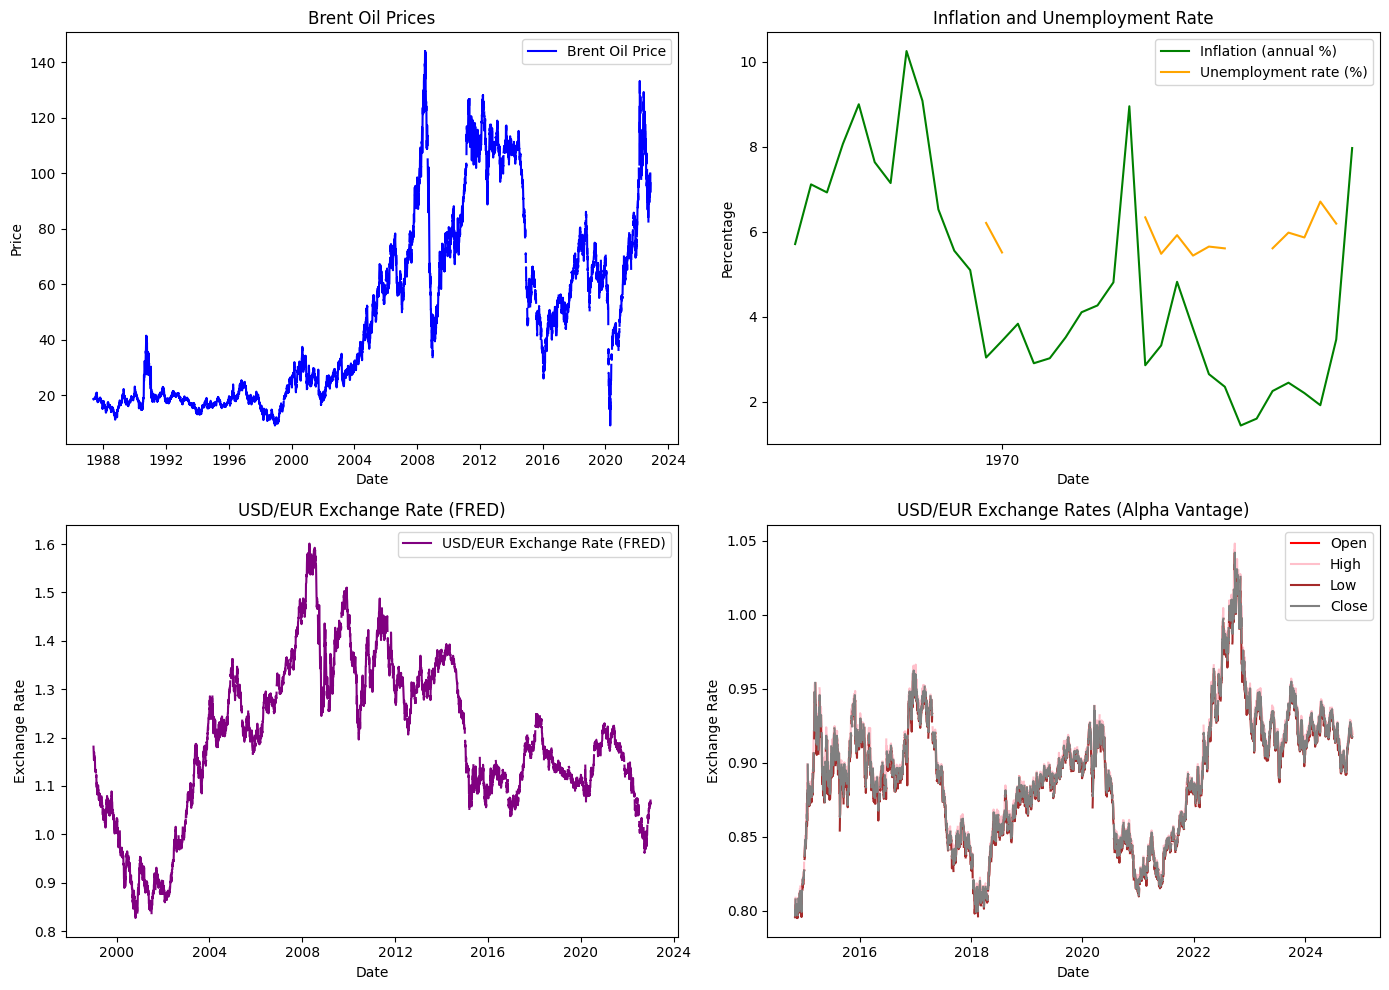

In [10]:
# Load the datasets and standardize the date column
df = load_data(df_path, 'Date')
inflation = load_data(inflation_path, 'date')
exchange_rate_fred = load_data(exchange_rate_fred_path, 'DATE')
exchange_rate_vintage = load_data(exchange_rate_vintage_path, 'Unnamed: 0')

# Merge datasets on 'Date' column using an outer join to keep all dates
merged_data = df.merge(inflation, on='Date', how='outer') \
                .merge(exchange_rate_fred, on='Date', how='outer') \
                .merge(exchange_rate_vintage, on='Date', how='outer')

# Sort by 'Date' to ensure data is in chronological order
merged_data = merged_data.sort_values(by='Date')

# Plot each column
plt.figure(figsize=(14, 10))

# Plot Brent Oil Prices
plt.subplot(2, 2, 1)
plt.plot(merged_data['Date'], merged_data['Price'], label='Brent Oil Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Brent Oil Prices')
plt.legend()

# Plot Inflation and Unemployment rate
plt.subplot(2, 2, 2)
plt.plot(merged_data['Date'], merged_data['Inflation (annual %)'], label='Inflation (annual %)', color='green')
plt.plot(merged_data['Date'], merged_data['Unemployment rate (%)'], label='Unemployment rate (%)', color='orange')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.title('Inflation and Unemployment Rate')
plt.legend()

# Plot USD/EUR Exchange Rate (FRED)
plt.subplot(2, 2, 3)
plt.plot(merged_data['Date'], merged_data['DEXUSEU'], label='USD/EUR Exchange Rate (FRED)', color='purple')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('USD/EUR Exchange Rate (FRED)')
plt.legend()

# Plot Exchange Rates (Alpha Vantage)
plt.subplot(2, 2, 4)
plt.plot(merged_data['Date'], merged_data['Open'], label='Open', color='red')
plt.plot(merged_data['Date'], merged_data['High'], label='High', color='pink')
plt.plot(merged_data['Date'], merged_data['Low'], label='Low', color='brown')
plt.plot(merged_data['Date'], merged_data['Close'], label='Close', color='gray')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('USD/EUR Exchange Rates (Alpha Vantage)')
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
import csv
from datetime import datetime, timedelta  # Ensure correct imports
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.options import Options
from bs4 import BeautifulSoup
import logging

# Setup logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Generate date endpoints
start_date = datetime(2007, 1, 1)  # Use datetime.datetime explicitly
end_date = datetime(2022, 11, 14)
endpoints = [
    (start_date + timedelta(days=i)).strftime("%b%d.%Y").lower()
    for i in range((end_date - start_date).days + 1)
]

# Specify the target events
events = [
    'US CPI m/m', 'US Factory Orders m/m', 'US Advance GDP q/q', 'US Core CPI m/m',
    'US Industrial Production m/m', 'US Capacity Utilization Rate', 'US Trade Balance',
    'US Unemployment Rate', 'CA Unemployment Rate', 'CA Employment Change', 'EZ Consumer Confidence',
    'US ISM Services PMI', 'US Retail Sales m/m', 'US Non-Farm Employment Change',
    'US Average Hourly Earnings m/m', 'US Natural Gas Storage', 'US Gasoline Inventories',
    'US Distillate Inventories', 'US Crude Oil Inventories', 'US ISM Manufacturing PMI'
]

# File path for storing data
file_path = "../data/scraped_calendar_events.csv"

# Selenium options
options = Options()
# Uncomment the following line to run in headless mode
# options.add_argument("--headless")
options.set_preference("profile.managed_default_content_settings.images", 2)

# Start the Selenium driver
driver = webdriver.Firefox(options=options)

try:
    for endpoint in endpoints:
        try:
            driver.get(f"https://www.energyexch.com/calendar?day={endpoint}")
            element = driver.find_element(By.CLASS_NAME, 'calendar__table')
            html_content = element.get_attribute('innerHTML')
            soup = BeautifulSoup(html_content, 'html.parser')
            table_rows = soup.select('.calendar__row')

            for row in table_rows:
                try:
                    title_element = row.select_one('.calendar__event-title')
                    if title_element and title_element.get_text(strip=True) in events:
                        title = title_element.get_text(strip=True)
                        actual = row.select_one('.calendar__actual').get_text(strip=True) if row.select_one('.calendar__actual') else 'N/A'
                        forecast = row.select_one('.calendar__forecast').get_text(strip=True) if row.select_one('.calendar__forecast') else 'N/A'
                        previous = row.select_one('.calendar__previous').get_text(strip=True) if row.select_one('.calendar__previous') else 'N/A'

                        data = [endpoint, title, actual, forecast, previous]
                        with open(file_path, mode='a', newline='') as file:
                            writer = csv.writer(file)
                            writer.writerow(data)

                        logger.info(f"Successfully scraped {title} for Date: {endpoint}")

                except Exception as e:
                    logger.error(f"Error processing a row for date {endpoint}: {e}")

        except Exception as e:
            logger.error(f"Error while accessing endpoint {endpoint}: {e}")

finally:
    driver.quit()
    logger.info("Scraping complete.")


ERROR:__main__:Error while accessing endpoint oct15.2007: HTTPConnectionPool(host='localhost', port=55324): Read timed out. (read timeout=120)
ERROR:__main__:Error while accessing endpoint oct16.2007: HTTPConnectionPool(host='localhost', port=55324): Read timed out. (read timeout=120)
ERROR:__main__:Error while accessing endpoint oct21.2008: HTTPConnectionPool(host='localhost', port=55324): Read timed out. (read timeout=120)
ERROR:__main__:Error while accessing endpoint oct22.2008: HTTPConnectionPool(host='localhost', port=55324): Read timed out. (read timeout=120)
ERROR:__main__:Error while accessing endpoint oct23.2008: HTTPConnectionPool(host='localhost', port=55324): Read timed out. (read timeout=120)
ERROR:__main__:Error while accessing endpoint oct24.2008: HTTPConnectionPool(host='localhost', port=55324): Read timed out. (read timeout=120)
ERROR:__main__:Error while accessing endpoint oct25.2008: HTTPConnectionPool(host='localhost', port=55324): Read timed out. (read timeout=120)

In [53]:
economic_factor = pd.read_csv("../data/scraped_calendar_events.csv")
economic_factor.head()

,Date,Event,Actual,Forecast,Previous
0,jan03.2007,US ISM Manufacturing PMI,51.4,51.0,49.5
1,jan04.2007,US Factory Orders m/m,0.9%,1.5%,-4.5%
2,jan04.2007,US ISM Services PMI,57.1,58.0,58.9
3,jan04.2007,US Crude Oil Inventories,-1.3M,-2.0M,-8.1M
4,jan04.2007,US Distillate Inventories,2.0M,0.9M,0.5M


In [55]:
economic_factor['Event'].value_counts()

Event
US Natural Gas Storage            345
US Crude Oil Inventories          343
US Distillate Inventories         343
US Gasoline Inventories           343
US ISM Manufacturing PMI           81
US Trade Balance                   81
EZ Consumer Confidence             81
US Factory Orders m/m              80
US Unemployment Rate               80
US Non-Farm Employment Change      80
US Average Hourly Earnings m/m     80
CA Unemployment Rate               80
CA Employment Change               80
US ISM Services PMI                80
US Retail Sales m/m                79
US Core CPI m/m                    79
US CPI m/m                         79
US Capacity Utilization Rate       78
US Industrial Production m/m       78
US Advance GDP q/q                 27
Name: count, dtype: int64

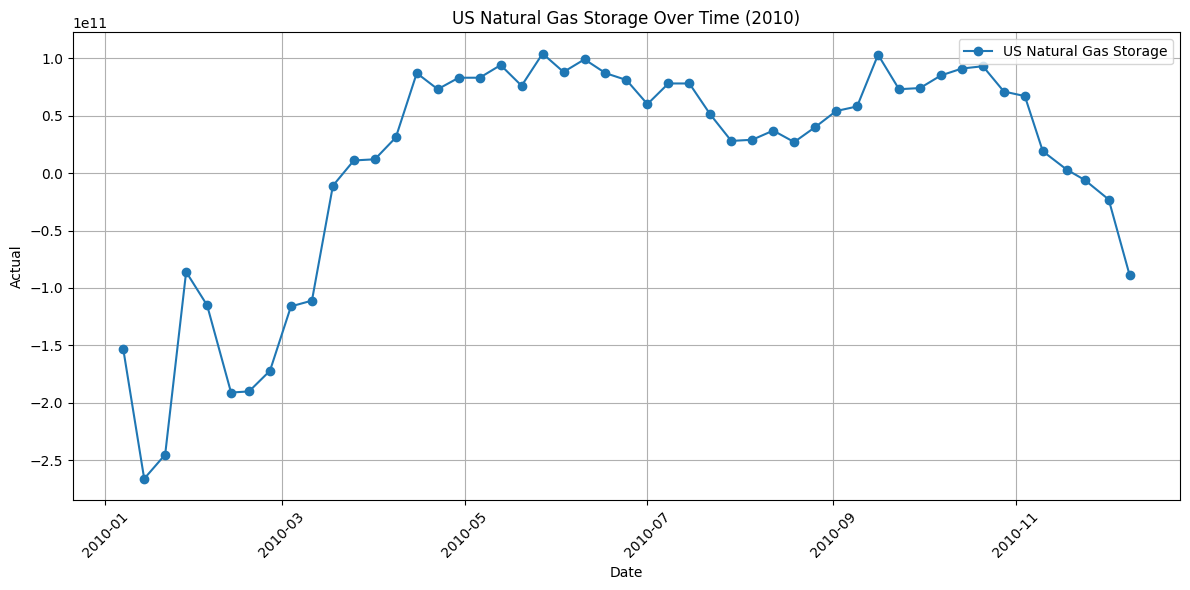

In [56]:
# Convert Date to datetime format
economic_factor['Date'] = pd.to_datetime(economic_factor['Date'], format='%b%d.%Y', errors='coerce')

# Filter for "US Natural Gas Storage" in 2010
filtered_data = economic_factor[
    (economic_factor['Event'] == 'US Natural Gas Storage') & 
    (economic_factor['Date'].dt.year == 2010)
]

# Function to handle conversion of values with 'B' (billions) or 'M' (millions)
def convert_value(val):
    if isinstance(val, str):
        if 'B' in val:
            return float(val.replace('B', '').replace('%', '').strip()) * 1e9  # Convert billions
        elif 'M' in val:
            return float(val.replace('M', '').replace('%', '').strip()) * 1e6  # Convert millions
        else:
            return float(val.replace('%', '').strip())  # Clean and convert to float
    return val

# Apply the conversion function to 'Actual Value'
filtered_data['Actual'] = filtered_data['Actual'].apply(convert_value)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['Date'], filtered_data['Actual'], label='US Natural Gas Storage', marker='o')
plt.title("US Natural Gas Storage Over Time (2010)")
plt.xlabel("Date")
plt.ylabel("Actual")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

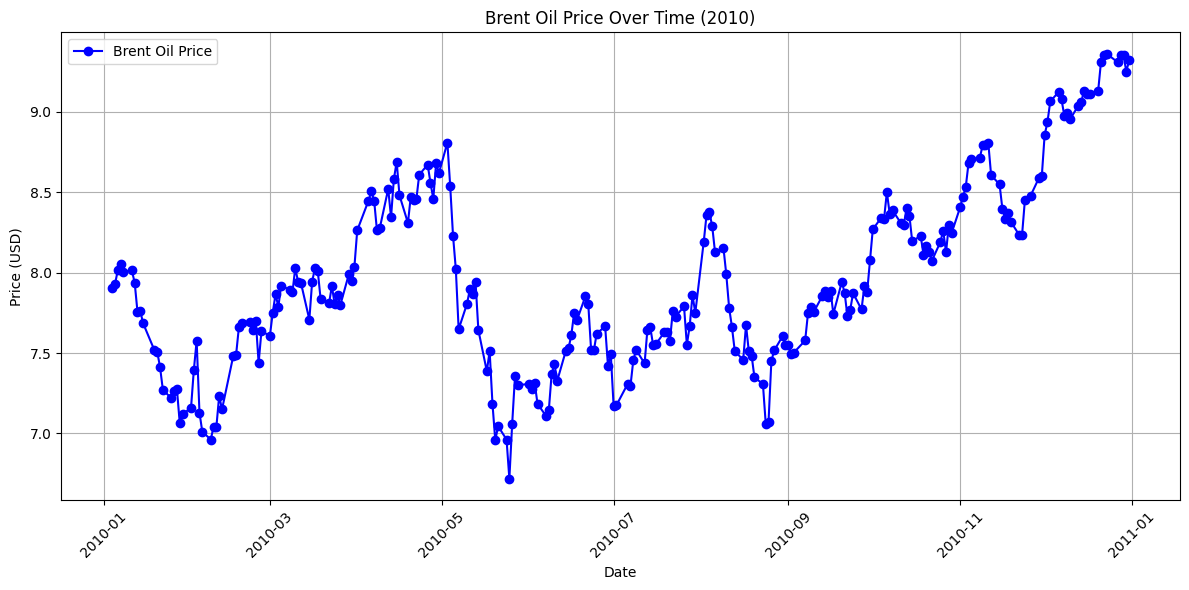

In [57]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')

# Filter data for the year 2010
df_2010 = df[df['Date'].dt.year == 2010]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df_2010['Date'], df_2010['Price']*0.1, label='Brent Oil Price', color='blue', marker='o')
plt.title("Brent Oil Price Over Time (2010)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()